In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
iris = pd.DataFrame(iris.data[:,1:3], columns=iris.feature_names[1:3])
iris.head()

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

iris = StandardScaler().fit_transform(iris)

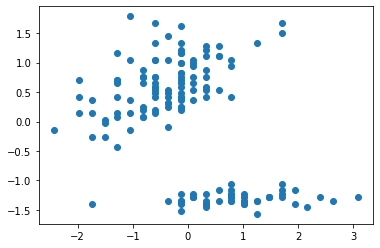

In [ ]:
plt.scatter(iris[:, 0], iris[:, 1])

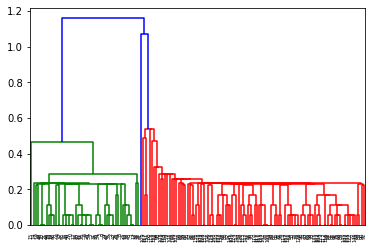

In [ ]:
hclust = linkage(iris)
dendrogram(hclust)
plt.show()

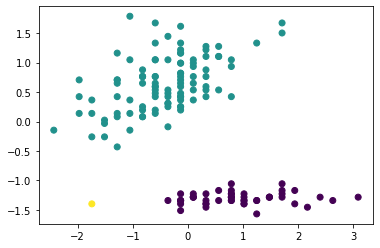

In [ ]:
from scipy.cluster.hierarchy import fcluster

fclust = fcluster(hclust, 3, criterion="maxclust")
plt.scatter(iris[:, 0], iris[:, 1], c=fclust)

In [ ]:
from sklearn.cluster import KMeans

iris_km = datasets.load_iris()
iris_km = pd.DataFrame(iris_km.data[:,1:3], columns=iris_km.feature_names[1:3])
iris_km.head()

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_km)

KMeans(n_clusters=3)

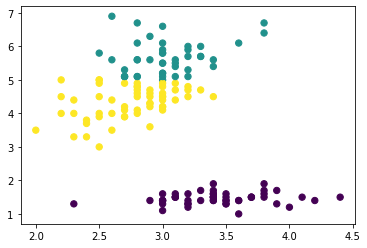

In [ ]:
labels = kmeans.labels_
ds0 = iris_km.iloc[np.where(labels==0)]
ds1 = iris_km.iloc[np.where(labels==1)]
ds2 = iris_km.iloc[np.where(labels==2)]

plt.scatter(iris_km['sepal width (cm)'], iris_km['petal length (cm)'], c=labels, s=40, cmap='viridis')

In [ ]:
# you can use these functions
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

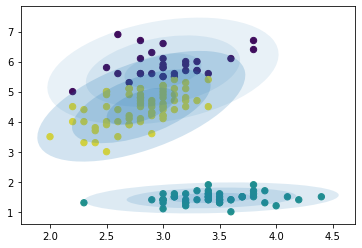

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(iris_km)
predictions = gmm.predict(iris_km)
plt.scatter(iris_km['sepal width (cm)'], iris_km['petal length (cm)'], c=predictions, s=40, cmap='viridis')

w_factor = 0.2 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
  draw_ellipse(pos, covar, alpha=w * w_factor)

For help on using the functions see the documentation:

Hierarchical Clustering:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

KMeans:
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Gaussian Mixture:
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

Principle Component Analysis (PCA):
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 

(or Google sklearn PCA)